In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# FILE PATHS TO XPM FILE
path_wam = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_wam.xpm"
path_wch = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_wch.xpm"
path_wop = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_wop.xpm"
path_wc36 = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_wc36m.xpm"
path_mam = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_mam.xpm"
path_mch = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_mch.xpm"
path_mop = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_mop.xpm"
path_mc36 = r"C:\Users\vaibh\Documents\Analysis\Code\Code\XPMFiles\ss_mc36m.xpm"

In [4]:
ff = ['wam', 'wch', 'wop', 'wc36', 'mam', 'mch', 'mop', 'mc36']

prev = "/* y-axis:  1 2 3 4"

In [5]:
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as file:
        lines = file.readlines()
    
    flag = False
    globals()[f'data_{f}'] = []
    for x in lines:
        if not flag:
            if x.strip().startswith(prev):
                flag=True
            continue
        character_list = [char for char in x.strip() if char.isalpha() or char == '~']
        globals()[f'data_{f}'].append(character_list)
        

In [6]:
col = list(range(0, int(1e+06)+1, 200))
idx = list(range(161, 201))
idx_ch = list(range(161, 200))
len(col)
# len(idx)

5001

In [7]:
for f in ff:
    if f in ['wch', 'mch', 'wc36', 'mc36']:
        dt = globals()[f'data_{f}']
        globals()[f'df_{f}'] = pd.DataFrame(data=dt, columns=col, index=idx_ch)
        globals()[f'df_{f}'] = globals()[f'df_{f}'].T
    else:
        dt = globals()[f'data_{f}']
        globals()[f'df_{f}'] = pd.DataFrame(data=dt, columns=col, index=idx)    
        globals()[f'df_{f}'] = globals()[f'df_{f}'].T

In [8]:
df_wch.head()

,161,162,163,164,165,166,167,168,169,170,...,190,191,192,193,194,195,196,197,198,199
0,~,H,H,H,H,H,H,H,H,~,...,T,T,T,H,H,H,H,H,~,~
200,~,H,H,H,H,H,H,H,H,~,...,H,H,H,H,H,H,H,H,~,~
400,~,H,H,H,H,H,H,H,H,~,...,H,H,H,H,H,H,H,H,~,~
600,~,H,H,H,H,H,H,H,H,~,...,H,H,H,H,H,H,H,H,~,~
800,~,H,H,H,H,H,H,H,H,~,...,H,H,H,H,H,H,H,H,~,~


In [9]:
for f in ['wch', 'mch', 'wc36', 'mc36']:
    last_col = globals()[f'df_{f}'].iloc[:, -1]
    globals()[f'df_{f}'][200] = last_col

In [10]:
# SAVING TO EXCEL FILES
# for f in ff:
#     globals()[f'df_{f}'].to_excel(f'ss_{f}.xlsx', index=True)

In [11]:
# NEW APPROACH
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as file:
        lines = file.readlines()
    lines = lines[9:]
    globals()[f'char_{f}'] = []
    for x in lines:
        if x.strip().startswith("/* x-axis:"):
            break
        globals()[f'char_{f}'].append(x.strip()[1])    

In [12]:
char_wam

['~', 'S', 'T', 'H', 'G']

In [13]:
# Creating 2d arrays by passing actually present characters
for f in ff:
    globals()[f'arr_i{f}'] = np.empty(globals()[f'df_{f}'].shape, dtype=int)
    clist = globals()[f'char_{f}']
    for c, i in zip(clist, range(len(clist))):
        globals()[f'arr_i{f}'][globals()[f'df_{f}'] == c] = i

In [14]:
df_mam

,161,162,163,164,165,166,167,168,169,170,...,191,192,193,194,195,196,197,198,199,200
0,~,~,~,T,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,~,~
200,~,~,~,T,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,~,~
400,~,~,~,T,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,~,~
600,~,~,~,T,T,H,H,H,H,H,...,H,H,H,H,H,H,H,H,~,~
800,~,~,~,H,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,~,~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999200,~,~,~,S,T,T,~,G,G,G,...,H,H,H,H,~,T,T,T,~,~
999400,~,~,~,T,T,T,~,S,T,T,...,H,H,H,H,~,T,T,T,~,~
999600,~,~,~,~,T,T,~,S,T,T,...,H,H,H,H,~,T,T,T,~,~
999800,~,~,~,~,T,T,~,T,T,T,...,H,H,H,H,S,T,T,T,~,~


In [15]:
arr_imam[0]

array([0, 0, 0, 4, 5, 5, 5, 5, 5, 5, 0, 3, 0, 4, 5, 5, 5, 5, 4, 4, 4, 7,
       7, 7, 0, 0, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0])

In [16]:
# CREATING RESPECTIVE COLOR CODE
from matplotlib import colors
legtocol = {'Coil' : 'white', 'β-sheet': 'red', 'β-bridge': 'black', 'Bend': 'green', 'Turn': 'yellow', 'α-helix': 'blue', '3₁₀-helix': 'gray', 'π-helix': 'purple'}
chartoleg = {'~': 'Coil', 'E': 'β-sheet', 'B': 'β-bridge', 'S': 'Bend', 'T': 'Turn', 'H': 'α-helix', 'G': '3₁₀-helix', 'I': 'π-helix'}

for f in ff:
    globals()[f'color_{f}'] = {}
    for c in globals()[f'char_{f}']:
        globals()[f'color_{f}'][chartoleg[c]] = legtocol[chartoleg[c]]
    
    globals()[f'cmap_{f}'] = colors.ListedColormap(globals()[f'color_{f}'].values())
    

In [17]:
color_mam = {
    r"coil": "#FFFFFF",
    r"beta-sheet": "#FF0000",
    r"beta-bridge": "#000000",
    r"bend": "#008000",
    r"turn": "#FFFF00",
    r"A-Helix": "#0000FF",
    r"5-helix": "#808080",
    r"3-Helix": "#800080",
}
cmap_mam = colors.ListedColormap(color_mam.values())

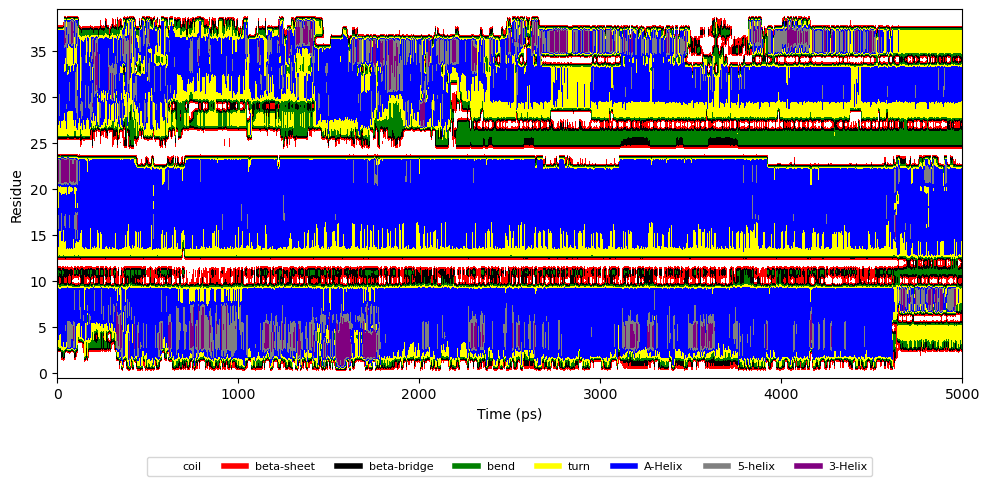

In [71]:
plt.figure(figsize=(10, 5))
plt.imshow(arr_imam.T, cmap=cmap_mam, origin='lower', aspect='auto')
plt.xlabel("Time (ps)")
plt.ylabel("Residue")
# plt.yticks(np.arrange(161, 201))

# # Custom legend below the DSSP plot
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color=cmap_mam(i), lw=4) for i in range(len(color_mam))
]
plt.legend(
    custom_lines, color_mam.keys(), loc="upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=len(color_mam), fontsize=8
)
plt.tight_layout()

plt.savefig('forlegend.jpeg', dpi=600)

plt.show()

In [19]:
import plotly.graph_objects as go

In [20]:
colorscales = [color_mam[key] for key in color_mam]
color_scale = [(i/(len(color_mam) - 1), color) for i, color in enumerate(colorscales)]

##### USE THIS CODE (FINAL)

##### Plot using Plotly()

In [21]:
import plotly.express as px

In [102]:
fig = px.imshow(arr_imc36.T, color_continuous_scale=list(color_mc36.values()), origin='lower', aspect='auto')

# # Define the border shape
border_shape = {
    'type': 'rect',
    'xref': 'paper',
    'yref': 'paper',
    'x0': 0,
    'y0': 0,
    'x1': 1,
    'y1': 1,
    'line': {'color': 'black', 'width': 1},
    'layer': 'below'
}
# fig.update_layout(width=600, height=300)
fig.update_layout(coloraxis_showscale=False, width=500, height=260, margin=dict(l=33, r=33, t=33, b=33),
                  shapes=[border_shape],
                  title = 'c36m (Mutant)',
                  title_x=0.5,
                  title_xanchor='center',
                    yaxis=dict(
                        title='Residues',
                        showline=True, 
                        linewidth=1,
                        ticks = 'outside',
                        linecolor='black',
                        tickmode='array',
                        tickvals=list(range(0, 40, 3)),  # Assuming 0-39 in original axis corresponds to 161-200
                        ticktext=list(range(161, 201, 3)), # New tick labels from 161 to 200
                        ticklen=5,
                        tickwidth=1,
                        tickfont=dict(size=13),
                        titlefont=dict(size=16)
                    ),
                    xaxis=dict(
                        title = 'Time (ps)',
                        ticks='outside',
                        tickmode='array',
                        tickvals=[0, 1250, 2500, 3750, 5000],  # Indices corresponding to desired ps
                        ticktext=['0', '250000', '500000', '750000', '1000000'],  # Ticks at every 250,000 ps
                        ticklen=5,
                        tickwidth=1,
                        tickfont=dict(size=13),
                        titlefont=dict(size=16)
                    )
                )  


fig.show()

##### Percentage Calculations

In [ ]:
idx_char = ['~', 'E', 'B', 'S', 'T', 'H', 'G', 'I']
# freq_wam = pd.DataFrame(index=idx_char, columns=range(161,200), dtype=int)
for f in ff:
    globals()[f'freq_{f}'] = pd.DataFrame(index=idx_char, columns=range(161,200), dtype=int)
    for col in range(161, 201):
        col_counts = globals()[f'df_{f}'][col].value_counts()
        globals()[f'freq_{f}'][col] = col_counts.reindex(idx_char, fill_value=0)

In [ ]:
legends = ['Coil', 'β-sheet', 'β-bridge', 'Bend', 'Turn', 'α-helix', '3₁₀-helix', 'π-helix']
print(legends)

['Coil', 'β-sheet', 'β-bridge', 'Bend', 'Turn', 'α-helix', '3₁₀-helix', 'π-helix']


In [ ]:
for f in ff:
    globals()[f'freq_{f}'].index = legends

In [ ]:
freq_wam.sum(axis=1)

Coil          30271
β-sheet           0
β-bridge          0
Bend           4530
Turn          36775
α-helix      125872
3₁₀-helix      2592
π-helix           0
dtype: int64

SS PLOTTING FOR ALL

In [ ]:
# creating dictionaries of color codes for each system


### NEW Approach